# Naive Bayes Implementation

## Problem Statement: Handwritten Digit classification using NB

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

#load data
from sklearn.datasets import load_digits

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [6]:
# its a functional data which has dict lke representation
dir(load_digits())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
# lets prepare data
print(load_digits()['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
d = load_digits()

In [11]:
digit = pd.DataFrame(d.data,columns=d.feature_names)
digit.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
#lets check images from data
d.images[2]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

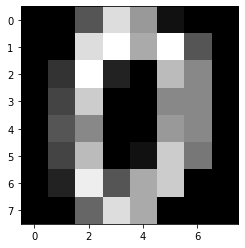

In [17]:
import matplotlib.pyplot as plt
plt.imshow(d.images[0])
plt.gray()

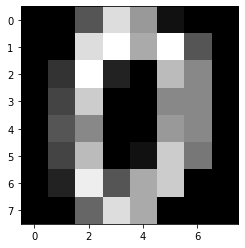

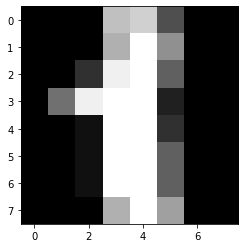

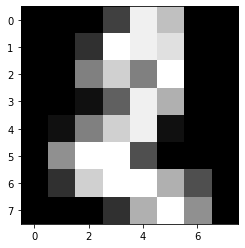

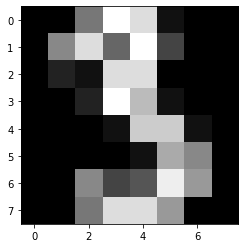

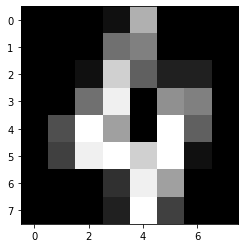

In [18]:
# lets plot multiple 
for i in range(5):
    plt.imshow(d.images[i])
    plt.gray()
    plt.show()

In [20]:
digit[:3] # input data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [21]:
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
len(d.target)

1797

In [23]:
# check unique targets
np.unique(d.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

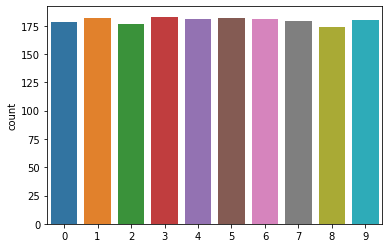

In [24]:
#check class balancing
sns.countplot(d.target)

In [25]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(digit,d.target)

In [26]:
#training
gnb = GaussianNB()

In [27]:
gnb.fit(X_train,y_train)

GaussianNB()

In [29]:
# score of train data
gnb.score(X_train,y_train)*100

89.6807720861173

In [31]:
# Testing# 
y_pred = gnb.predict(X_test)
y_pred #predicted output

array([1, 2, 7, 6, 5, 1, 8, 7, 4, 9, 0, 9, 6, 6, 4, 3, 3, 3, 6, 9, 8, 4,
       2, 9, 4, 2, 7, 6, 6, 4, 3, 2, 3, 8, 0, 1, 0, 3, 0, 4, 8, 6, 1, 5,
       6, 8, 7, 4, 7, 1, 8, 8, 4, 3, 7, 3, 3, 9, 1, 2, 5, 1, 8, 7, 7, 8,
       1, 3, 5, 9, 2, 7, 3, 7, 3, 7, 7, 5, 6, 1, 3, 0, 8, 1, 2, 8, 1, 0,
       7, 7, 5, 4, 0, 1, 8, 7, 1, 4, 9, 3, 4, 3, 2, 7, 4, 4, 2, 7, 0, 8,
       4, 3, 7, 0, 8, 3, 0, 0, 5, 6, 8, 8, 5, 5, 1, 2, 1, 1, 0, 6, 8, 2,
       5, 2, 8, 5, 6, 9, 4, 8, 6, 9, 7, 2, 7, 1, 5, 4, 0, 0, 9, 1, 4, 4,
       3, 0, 7, 5, 7, 3, 9, 2, 0, 5, 3, 7, 7, 1, 2, 5, 7, 6, 7, 2, 6, 3,
       6, 8, 4, 1, 7, 5, 6, 9, 0, 4, 7, 3, 8, 6, 6, 6, 9, 4, 4, 8, 7, 1,
       4, 0, 8, 4, 6, 3, 7, 3, 3, 8, 5, 1, 7, 1, 4, 8, 2, 9, 8, 8, 5, 6,
       1, 8, 7, 4, 8, 1, 9, 3, 2, 6, 9, 1, 8, 5, 6, 7, 1, 6, 2, 8, 9, 3,
       7, 4, 7, 4, 1, 2, 2, 7, 5, 2, 9, 3, 3, 0, 6, 7, 7, 7, 9, 7, 6, 8,
       7, 9, 1, 4, 7, 6, 3, 6, 2, 8, 4, 2, 9, 7, 8, 5, 6, 3, 8, 1, 3, 7,
       1, 7, 3, 6, 1, 3, 8, 7, 3, 5, 2, 4, 1, 2, 4,

In [32]:
# check actual output
y_test

array([1, 2, 7, 6, 5, 8, 1, 7, 4, 9, 0, 9, 6, 6, 4, 3, 3, 3, 9, 9, 8, 4,
       2, 9, 4, 2, 9, 6, 6, 4, 3, 2, 8, 8, 0, 1, 0, 3, 0, 4, 3, 6, 1, 5,
       6, 3, 7, 4, 5, 1, 9, 1, 4, 3, 7, 9, 9, 9, 1, 2, 5, 1, 8, 7, 7, 8,
       1, 3, 5, 9, 2, 9, 9, 7, 3, 8, 9, 5, 6, 1, 3, 0, 9, 1, 2, 8, 1, 0,
       4, 7, 5, 4, 0, 1, 8, 7, 1, 4, 9, 8, 4, 3, 2, 7, 4, 4, 2, 7, 0, 8,
       4, 3, 1, 0, 8, 3, 0, 0, 5, 6, 3, 8, 9, 5, 1, 2, 1, 2, 0, 4, 8, 2,
       5, 2, 8, 5, 6, 9, 4, 8, 6, 9, 7, 2, 7, 1, 5, 4, 0, 0, 9, 1, 4, 2,
       5, 0, 7, 5, 4, 3, 9, 1, 0, 5, 3, 4, 7, 1, 3, 5, 8, 6, 7, 2, 6, 3,
       6, 8, 4, 1, 7, 5, 6, 9, 0, 4, 9, 3, 8, 6, 6, 6, 9, 0, 4, 8, 3, 1,
       4, 0, 8, 4, 6, 3, 1, 9, 3, 8, 5, 1, 4, 1, 4, 8, 2, 9, 3, 8, 5, 6,
       8, 3, 7, 4, 8, 1, 9, 5, 2, 6, 9, 1, 9, 5, 6, 7, 9, 6, 2, 8, 9, 3,
       8, 4, 7, 4, 1, 2, 2, 7, 5, 2, 9, 3, 3, 0, 6, 8, 8, 7, 9, 1, 6, 8,
       7, 9, 1, 4, 7, 6, 3, 6, 2, 3, 4, 2, 9, 4, 4, 5, 6, 3, 8, 8, 9, 7,
       1, 5, 3, 6, 9, 3, 3, 7, 3, 8, 2, 4, 1, 2, 4,

#### Check performance of a model using accurac measures

In [33]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report

In [35]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[35,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  0,  0,  0,  3,  2,  1],
       [ 0,  2, 33,  0,  1,  0,  0,  0,  5,  0],
       [ 0,  0,  1, 45,  0,  0,  0,  1,  7,  0],
       [ 0,  0,  0,  0, 45,  0,  1, 10,  1,  0],
       [ 0,  0,  0,  2,  0, 36,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  3,  0,  2,  0,  2,  0,  5, 30,  0],
       [ 0,  4,  0,  8,  0,  2,  1,  6,  4, 35]], dtype=int64)

Text(0.5, 15.0, 'Predicted Output')

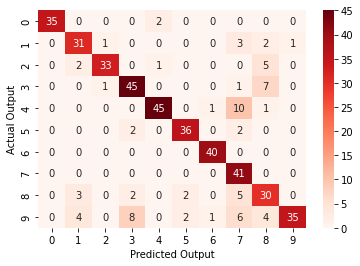

In [44]:
sns.heatmap(cm,annot=True,xticklabels=d.target_names,yticklabels=d.target_names,cmap='Reds')
plt.ylabel('Actual Output')
plt.xlabel('Predicted Output')

In [42]:
sum(y_test==0)

37

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.78      0.82      0.79        38
           2       0.94      0.80      0.87        41
           3       0.79      0.83      0.81        54
           4       0.94      0.79      0.86        57
           5       0.90      0.90      0.90        40
           6       0.95      1.00      0.98        40
           7       0.60      1.00      0.75        41
           8       0.61      0.71      0.66        42
           9       0.97      0.58      0.73        60

    accuracy                           0.82       450
   macro avg       0.85      0.84      0.83       450
weighted avg       0.85      0.82      0.83       450

